## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.


## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

## Примечания

1. profile_id это номер сессии испытаний. т.е. в датасете несколько испытаний и у них есть айдишник, 1 испытание может идти до 6 часов. каждая запись это показатели через 2 секунды от предыдущей. 
2. Значения в данных это отклонения от эталонных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков. Постройте pairplot**

In [3]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [4]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [5]:
round(df.describe(), 3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,54.279,36.230,66.343,-25.134,56.879,2202.081,-68.717,37.413,58.507,48.188,24.565,31.106,40.793
std,44.173,21.786,28.672,63.092,22.952,1859.663,64.933,92.182,19.001,19.991,1.930,77.136,25.045
min,-25.291,10.624,18.586,-131.530,18.134,-275.549,-278.004,-293.427,20.857,18.077,8.783,-246.467,2.000
25%,12.070,18.698,42.788,-78.691,38.416,317.111,-115.406,1.096,43.152,31.990,23.185,-0.137,17.000
50%,48.938,26.900,65.110,-7.430,56.036,1999.977,-51.094,15.774,60.266,45.626,24.797,10.860,43.000
75%,90.034,49.857,88.141,1.470,75.587,3760.639,-2.980,100.612,72.008,61.461,26.217,91.597,65.000
max,133.037,101.599,141.363,131.470,111.946,6000.015,0.052,301.708,113.607,101.148,30.714,261.006,81.000


In [6]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

In [7]:
df['profile_id'].nunique()

69

In [8]:
round(df['motor_speed'].describe(), 3)

count    1330816.000
mean        2202.081
std         1859.663
min         -275.549
25%          317.111
50%         1999.977
75%         3760.639
max         6000.015
Name: motor_speed, dtype: float64

In [9]:
df.corr().style.background_gradient('summer_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


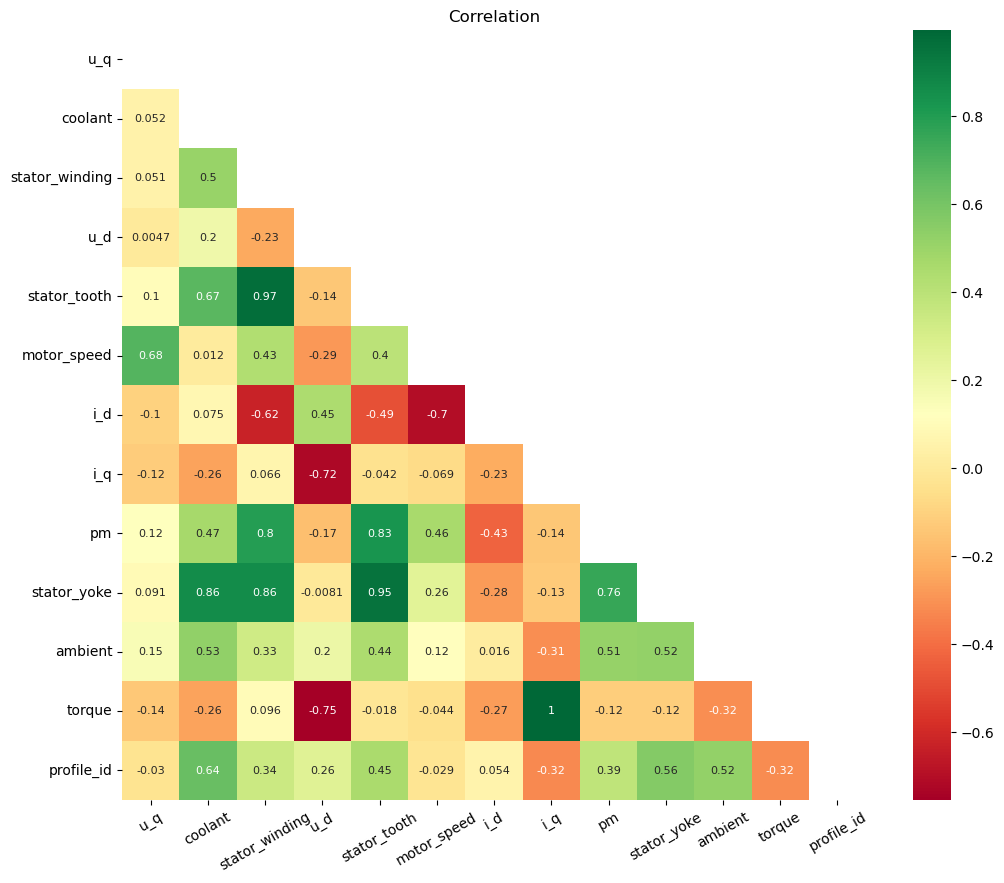

In [10]:
mask = np.triu(df.corr())
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot= True, cmap = "RdYlGn", annot_kws = {'size': 8}, mask = mask)
plt.title('Correlation')
plt.xticks(rotation = 30)
plt.show()

In [11]:
df17 = (df[df['profile_id']==17]).copy(deep = True)
round(df17, 4).head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.4507,18.8052,19.0867,-0.3501,18.2932,0.0029,0.0044,0.0003,24.5542,18.3165,19.8507,0.1871,17
1,-0.3257,18.8186,19.0924,-0.3058,18.2948,0.0003,0.0006,-0.0008,24.5381,18.3150,19.8507,0.2454,17
2,-0.4409,18.8288,19.0894,-0.3725,18.2941,0.0024,0.0013,0.0004,24.5447,18.3263,19.8507,0.1766,17
3,-0.3270,18.8356,19.0830,-0.3162,18.2925,0.0061,0.0000,0.0020,24.5540,18.3308,19.8506,0.2383,17
4,-0.4712,18.8570,19.0825,-0.3323,18.2914,0.0031,-0.0643,0.0372,24.5654,18.3267,19.8506,0.2082,17
5,-0.5390,18.9015,19.0771,0.0091,18.2906,0.0096,-0.6136,0.3367,24.5736,18.3239,19.8506,0.4762,17
6,-0.6531,18.9417,19.0746,0.2389,18.2925,0.0013,-1.0056,0.5542,24.5766,18.3219,19.8506,0.6700,17
7,-0.7584,18.9609,19.0825,0.3951,18.2940,0.0014,-1.2884,0.7064,24.5749,18.3147,19.8506,0.7520,17
8,-0.7271,18.9735,19.0855,0.5466,18.2920,0.0006,-1.4905,0.8173,24.5671,18.3069,19.8506,0.9105,17
9,-0.8743,18.9878,19.0760,0.5789,18.2872,-0.0012,-1.6345,0.8980,24.5532,18.3017,19.8506,0.9240,17


In [12]:
df17.drop('profile_id', axis = 1, inplace = True)

In [13]:
df17.corr().style.background_gradient('summer_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
u_q,1.000000,-0.239625,-0.784396,0.966760,-0.700702,0.203129,0.897917,-0.969098,-0.464588,-0.635884,0.416671,-0.968925
coolant,-0.239625,1.000000,0.204825,-0.245829,0.183733,0.002441,-0.237983,0.246189,0.123472,0.170986,-0.076361,0.246063
stator_winding,-0.784396,0.204825,1.000000,-0.836115,0.987628,0.173924,-0.819573,0.826689,0.850041,0.963280,-0.010320,0.827855
u_d,0.966760,-0.245829,-0.836115,1.000000,-0.753740,-0.049241,0.978941,-0.999511,-0.506054,-0.686764,0.397286,-0.999797
stator_tooth,-0.700702,0.183733,0.987628,-0.753740,1.000000,0.194620,-0.737416,0.742230,0.916888,0.991399,0.123749,0.743361
motor_speed,0.203129,0.002441,0.173924,-0.049241,0.194620,1.000000,-0.242610,0.033396,0.182916,0.196263,0.166127,0.038465
i_d,0.897917,-0.237983,-0.819573,0.978941,-0.737416,-0.242610,1.000000,-0.975509,-0.482295,-0.668893,0.387535,-0.977335
i_q,-0.969098,0.246189,0.826689,-0.999511,0.742230,0.033396,-0.975509,1.000000,0.491600,0.674204,-0.410845,0.999784
pm,-0.464588,0.123472,0.850041,-0.506054,0.916888,0.182916,-0.482295,0.491600,1.000000,0.947211,0.422252,0.492173
stator_yoke,-0.635884,0.170986,0.963280,-0.686764,0.991399,0.196263,-0.668893,0.674204,0.947211,1.000000,0.212657,0.675194


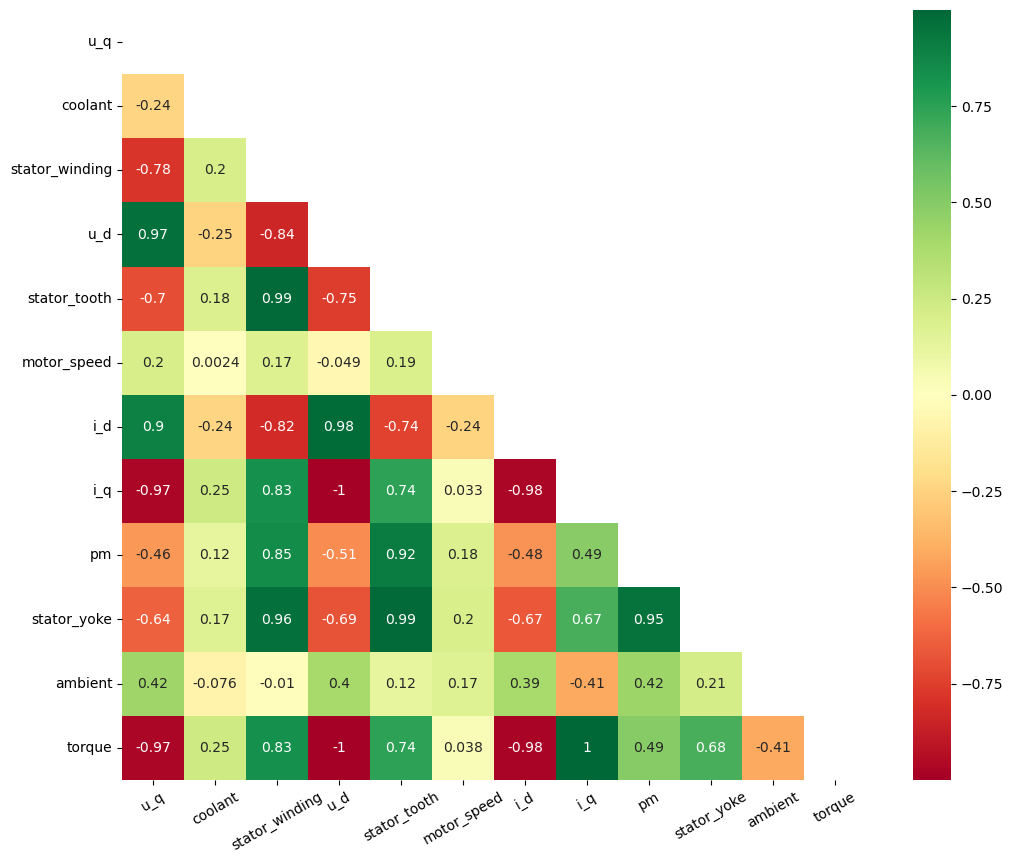

In [14]:
mask17 = np.triu(df17.corr())
plt.figure(figsize = (12,10))
sns.heatmap(df17.corr(), annot = True, cmap = "RdYlGn", mask = mask17)
plt.xticks(rotation = 30)
plt.show()

_Как видно из корреляционного графика, все температуры имеют очень сильную зависимость, части статора нагреваются_

_равномерно, за ними следует ротор, температура которого тоже поднимается с ростом нагрева статора_

In [15]:
round(df17['stator_tooth'],0).unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59.])

In [16]:
round(df17['stator_winding'], 0).unique()

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72.])

In [17]:
X17 = df17.drop('motor_speed', axis = 1)
y17 = df17['motor_speed']

Если строка в 2 секунды, то данный сеанс (17) длился чуть меньше 9 часов

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [18]:
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


### Сперва попробую с помощью температуры ротора предсказать скорость

In [19]:
X = round(df[['pm']], 4)
y = round(df['motor_speed'], 4)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

In [20]:
lr.coef_, lr.intercept_

(array([44.94913236]), -426.9512468619805)

In [21]:
round(X_test.describe(),4)

,pm
count,266164.0000
mean,58.5085
std,18.9701
min,20.8864
25%,43.2066
50%,60.2868
75%,71.9750
max,113.6066


<function matplotlib.pyplot.show(close=None, block=None)>

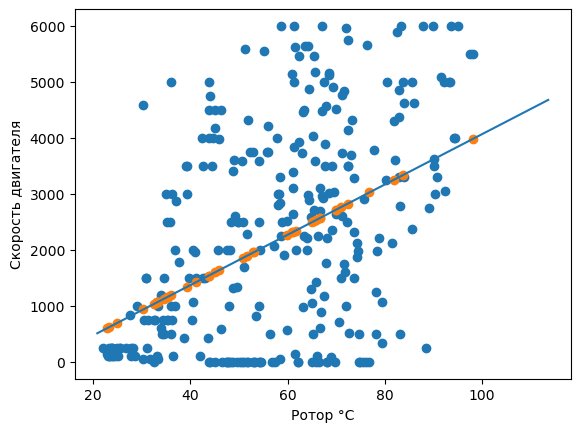

In [22]:
plt.scatter(X_train[:300], y_train[:300])

plt.scatter(X_train[:40], y_train_pred[:40])
plt.xlabel('Ротор °C')
plt.ylabel('Скорость двигателя')

def line_f(x):
    return lr.intercept_ + x*lr.coef_

x = [20.8864, 113.5897]
y = line_f(x)
plt.plot(x, y)
plt.show

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_train_pred, y_train), mean_squared_error(y_train_pred, y_train)

(1362.7393119967585, 2729180.853796195)

_Изначально так делать было бессмысленно, но было интересно посмотреть, что из такого обучения модели выйдет_

**тренировочный**

In [24]:
y_t1_pred = lr.predict(X_test)
y_t1_pred

array([2322.65010856, 3581.24379438, 1693.37574022, ..., 2493.46130646,
       1023.0852886 ,  775.10991518])

In [25]:
np.array(y_test) # невооруженным глазом видно, ошибка огромная

array([4.4999517e+03, 4.4999580e+03, 4.4000000e-03, ..., 1.3705662e+03,
       9.9998640e+02, 2.9999730e+02])

In [26]:
mean_absolute_error(y_t1_pred, y_test), mean_squared_error(y_t1_pred, y_test)

(1363.5926744625394, 2732809.457401719)

### Теперь попробую по нескольким параметрам

In [27]:
df['stator'] = (df['stator_tooth']+df['stator_winding']+df['stator_yoke'])/3 # средняя температура по всему статору
### там все равно очень большая корреляция

In [28]:
X = df[['pm', 'stator']]
y = df['motor_speed']

In [29]:
y

0          0.002866
1          0.000257
2          0.002355
3          0.006105
4          0.003133
             ...   
1330811    0.000380
1330812    0.002985
1330813    0.002301
1330814    0.005662
1330815    0.004395
Name: motor_speed, Length: 1330816, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([2381.17298428, 2386.44293475, 2378.48121023, ..., 2612.80252987,
       2892.00162746, 1620.23910692])

In [32]:
lr.coef_, lr.intercept_

(array([43.37612593,  1.49905912]), -421.1111143288972)

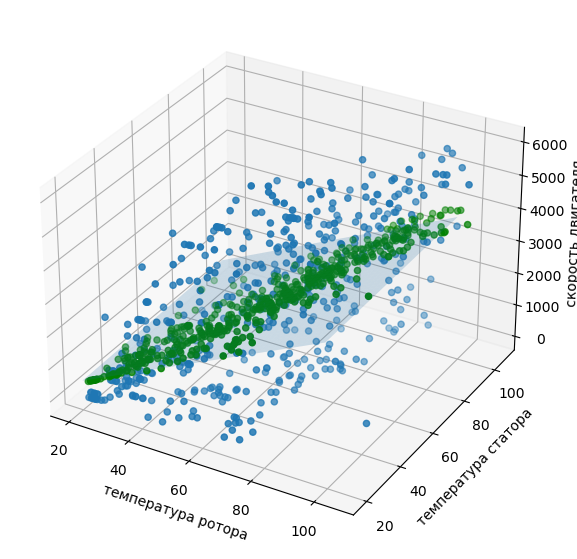

In [33]:
#%matplotlib notebook

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection='3d')
# Обучающая выборка
x_points = X_train.pm[:500]
y_points = X_train.stator[:500]
z_points = y_train[:500]

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('температура ротора')
ax.set_ylabel("температура статора")
ax.set_zlabel("скорость двигателя")
# Плоскость
def f_plane(x_point, y_point):
    return lr.intercept_ + x_point*lr.coef_[0] + y_point*lr.coef_[1]

x_point, y_point = np.meshgrid(range(20,100), range(20,100))
z_point = f_plane(x_point, y_point)

ax.plot_surface(x_point, y_point, z_point, alpha = 0.2)
# Ответы тренировочной выборки
ax.scatter(x_points, y_points, y_train_pred[:500], c = 'g')

plt.show()

_Здесь уже даже что-то отдаленно напоминает линейную зависимость_

_Но все равно очень далеко от истинны_

In [34]:
mean_absolute_error(y_train_pred, y_train), mean_squared_error(y_train_pred, y_train)

(1364.4720763286834, 2730936.7902359366)

In [35]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([2557.96188157, 2441.91659091, 2743.94367568, ..., 2801.37051748,
       2640.04486116, 1865.92846197])

In [36]:
np.array(round(y_test, 2))

array([ 3.40400e+01,  1.00000e-02,  3.17237e+03, ...,  1.99999e+03,
        5.49410e+02, -0.00000e+00])

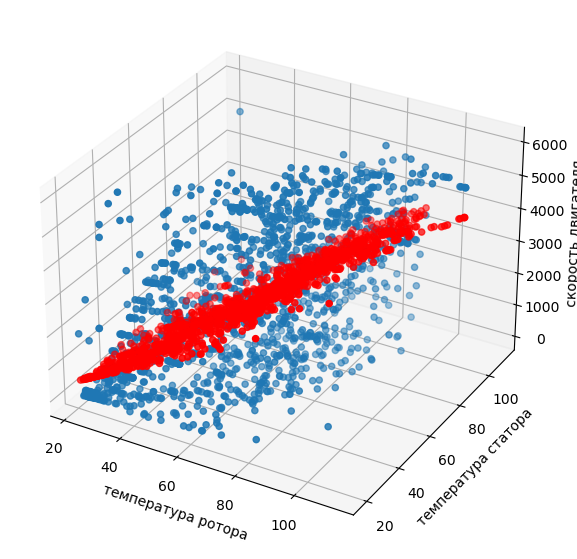

In [37]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection = '3d')
#Тестовая ыборка
x_points = X_test.pm[:1500]
y_points = X_test.stator[:1500]
z_points = y_test[:1500]

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('температура ротора')
ax.set_ylabel("температура статора")
ax.set_zlabel("скорость двигателя")
#Тестовые ответ
ax.scatter(x_points, y_points, y_test_pred[:1500], c = 'r')

plt.show()

In [38]:
mean_absolute_error(y_test_pred, y_test), mean_squared_error(y_test_pred, y_test)

(1362.8964953580466, 2725978.872332688)

_**MAE** и  **MSE** все равно получаются очень большие_

*Данные на тренировочном и тестовом образце практически идентичны*

### Попробую по трем параметрам (u_q, i_d, pm)

In [39]:
X = df[['u_q', 'i_d', 'pm']]
y = df['motor_speed']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
y_tr_predicted = lr.predict(X_train)
y_tr_predicted

array([3767.47487227, 4377.17210254, 2320.27830525, ..., -405.24044901,
       2007.99568513, -387.33636528])

In [42]:
np.array(round(y_train, 2))

array([3409.63, 5190.35, 2249.99, ...,    0.  , 1959.98,    0.  ])

In [43]:
mean_absolute_error(y_tr_predicted, y_train), mean_squared_error(y_tr_predicted, y_train)

(480.269753383307, 395100.2290778625)

In [44]:
y_tes_predicted = lr.predict(X_test)
y_tes_predicted

array([ 934.79229646, -624.74506256, -328.95971841, ..., 4000.68383126,
       -187.18867614, 2227.17545203])

In [45]:
np.array(round(y_test,2))

array([1000.  ,   99.97,    0.  , ..., 5499.95,   -0.  , 1999.98])

In [46]:
mean_absolute_error(y_tes_predicted, y_test), mean_squared_error(y_tes_predicted, y_test)

(480.7512226919622, 396210.81334205944)

В варианте поиска по трем параметрам ошибка ***MAE*** и ***MSE*** стали значительно ниже.

*Хотя это может быть связано с тем, что для прогнозирования результатов были выбраны параметры с высокой корреляцией
относительно скорости двигателя*

### Попытка определения на всем датасете

In [47]:
df.head(10).style.background_gradient(cmap='twilight')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,stator
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,18.565479
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,18.567384
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,18.569927
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,18.568802
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,18.566872
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17,18.563866
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17,18.563014
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17,18.563732
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17,18.561474
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17,18.554997


In [48]:
X = df.drop(['stator', 'profile_id', 'motor_speed',], axis = 1)
y = df['motor_speed']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle= True)
kf.get_n_splits(X_train, y_train)

for train, test in kf.split(X_train):
    print('X_Train:{0} | X_Test:{1}'.format(train,test))
    
for y_kf_train, y_kf_test in kf.split(y_train):
    print('Y_Train:{0} | Y_Test:{1}'.format(y_kf_train, y_kf_test))
    


X_Train:[      0       1       4 ... 1064649 1064650 1064651] | X_Test:[      2       3       5 ... 1064643 1064645 1064646]
X_Train:[      0       1       2 ... 1064649 1064650 1064651] | X_Test:[     13      14      32 ... 1064642 1064644 1064648]
X_Train:[      0       1       2 ... 1064647 1064648 1064649] | X_Test:[      6       7       9 ... 1064640 1064650 1064651]
X_Train:[      0       1       2 ... 1064649 1064650 1064651] | X_Test:[     17      22      23 ... 1064637 1064641 1064647]
X_Train:[      2       3       5 ... 1064648 1064650 1064651] | X_Test:[      0       1       4 ... 1064638 1064639 1064649]
Y_Train:[      0       1       3 ... 1064649 1064650 1064651] | Y_Test:[      2       5       6 ... 1064645 1064646 1064648]
Y_Train:[      2       3       5 ... 1064647 1064648 1064651] | Y_Test:[      0       1       4 ... 1064642 1064649 1064650]
Y_Train:[      0       1       2 ... 1064649 1064650 1064651] | Y_Test:[      9      19      27 ... 1064615 1064619 1064630]


*Ну разделить определенно получилось, и даже x и y соответствуют друг другу*

In [50]:
kx1, kx2, kx3, kx4, kx5 = kf.split(X_train)

In [51]:
df_x = [kx1, kx2, kx3, kx4, kx5]

***Преобразование индексов***

_Тренировочная_

In [52]:
x1 = pd.DataFrame(data = X, index=kx1[0])
x2 = pd.DataFrame(data = X, index=kx2[0])
x3 = pd.DataFrame(data = X, index=kx3[0])
x4 = pd.DataFrame(data = X, index=kx4[0])
x5 = pd.DataFrame(data = X, index=kx5[0])

y1 = pd.Series(data = y, index=kx1[0])
y2 = pd.Series(data = y, index=kx2[0])
y3 = pd.Series(data = y, index=kx3[0])
y4 = pd.Series(data = y, index=kx4[0])
y5 = pd.Series(data = y, index=kx5[0])

_Тестовая_

In [53]:
x1_test = pd.DataFrame(data = X, index = kx1[1])
x2_test = pd.DataFrame(data = X, index = kx2[1])
x3_test = pd.DataFrame(data = X, index = kx3[1])
x4_test = pd.DataFrame(data = X, index = kx4[1])
x5_test = pd.DataFrame(data = X, index = kx5[1])

y1_test = pd.Series(data = y, index=kx1[1])
y2_test = pd.Series(data = y, index=kx2[1])
y3_test = pd.Series(data = y, index=kx3[1])
y4_test = pd.Series(data = y, index=kx4[1])
y5_test = pd.Series(data = y, index=kx5[1])

In [54]:
xf = [x1,x2,x3,x4,x5]
yf = [y1,y2,y3,y4,y5]
xf_test = [x1_test,x2_test,x3_test,x4_test,x5_test]
yf_test = [y1_test,y2_test,y3_test,y4_test,y5_test]

In [55]:
x1.shape,x2.shape,x3.shape,x4.shape,x5.shape

((851721, 11), (851721, 11), (851722, 11), (851722, 11), (851722, 11))

In [56]:
y1.shape, y2.shape , y3.shape , y4.shape, y5.shape

((851721,), (851721,), (851722,), (851722,), (851722,))

In [57]:
for a, b, c, d in zip(xf, yf, xf_test, yf_test):
    lr.fit(a, b)
    lr_predd = lr.predict(c)
    print('MAE:%.3f | MSE:%.3f' %(mean_absolute_error(lr_predd, d), mean_squared_error(lr_predd, d)))

MAE:344.532 | MSE:220776.523
MAE:344.135 | MSE:220201.120
MAE:344.334 | MSE:218746.410
MAE:344.325 | MSE:220256.332
MAE:344.871 | MSE:221454.782


***Лучше всего проявляет себя первая модель, ее и буду использовать для тестирования на валидационных данных***

In [58]:
X_val.shape, y_val.shape

((266164, 11), (266164,))

In [59]:
lr.fit(x1, y1)
val_lr_predicted = lr.predict(X_val)
MAE = mean_absolute_error(val_lr_predicted, y_val)
MSE = mean_squared_error(val_lr_predicted, y_val)
print("MAE:%.3f | MSE:%.3f"%(MAE,MSE))

MAE:344.835 | MSE:220931.294


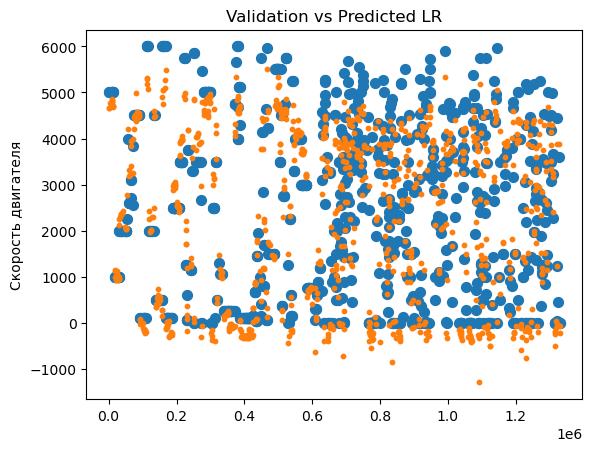

In [60]:
plt.scatter(X_val.index[:1000], y_val[:1000], s= 50)
plt.scatter(X_val.index[:1000], val_lr_predicted[:1000], s = 10)
plt.ylabel('Скорость двигателя')
plt.title("Validation vs Predicted LR")
plt.show()

_Сложно понять, но ответы явно далеки от истины_

**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [61]:
%%time

from sklearn.model_selection import cross_validate  ### Какой-то бред
from sklearn.neighbors import KNeighborsRegressor   ### но хотелось попробовать

#knr = KNeighborsRegressor(n_neighbors=3)
#cvs = cross_validate(knr, X_train, y_train,cv = 5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error'))
#print(cvs['test_neg_mean_absolute_error'])
#print(cvs['test_neg_mean_squared_error'])

CPU times: total: 31.2 ms
Wall time: 38 ms


***Решил оставить ту же разбивку, что и было выше в ЛР***

_Проверка на тестовом варианте_

In [62]:
%%time

knr = KNeighborsRegressor(n_neighbors=5)
for h, j, k, l in zip(xf, yf, xf_test, yf_test):
    knr.fit(h, j)
    kn_predd = knr.predict(k)
    print("MAE:%.2f | MSE %.2f" %(mean_absolute_error(kn_predd, l), mean_squared_error(kn_predd,l)))

MAE:10.45 | MSE 1001.04
MAE:10.36 | MSE 997.25
MAE:10.35 | MSE 1031.12
MAE:10.34 | MSE 1059.97
MAE:10.48 | MSE 1032.07
CPU times: total: 43.5 s
Wall time: 43.7 s


In [63]:
%%time

knr = KNeighborsRegressor(n_neighbors=3)
for h, j, k, l in zip(xf, yf, xf_test, yf_test):
    knr.fit(h, j)
    kn_predd = knr.predict(k)
    print("MAE:%.2f | MSE %.2f" %(mean_absolute_error(kn_predd, l), mean_squared_error(kn_predd,l)))

MAE:10.03 | MSE 947.01
MAE:9.95 | MSE 936.10
MAE:9.99 | MSE 986.71
MAE:9.97 | MSE 1012.89
MAE:10.07 | MSE 996.13
CPU times: total: 40.5 s
Wall time: 40.7 s


_Подозрительно маленькая ошибка_

_Проверка на тренировочном варианте_

In [64]:
knr.fit(X_train, y_train)
knr_train_pred = knr.predict(X_train)
print(mean_absolute_error(knr_train_pred, y_train), mean_squared_error(knr_train_pred, y_train))

7.211801716524813 454.16462249652517


In [65]:
pd.Series(knr_train_pred) # Индексы не совпадают, потому что преобразовывал в сериес

0          3741.011645
1           249.994659
2          4973.190302
3          3999.954590
4          1249.986979
              ...     
1064647    3532.893036
1064648    1704.775416
1064649     437.907019
1064650    2558.486623
1064651     250.009354
Length: 1064652, dtype: float64

In [66]:
y_train

1294389    3737.980113
344566      249.990616
706948     4973.422973
548590     3999.957031
526534     1249.988281
              ...     
752722     3527.909918
1182562    1703.774368
1114166     454.035553
1042834    2556.998650
339575      249.992523
Name: motor_speed, Length: 1064652, dtype: float64

_Ну, ответы на тренировочной выборке почти идентичны, нормально ли это ?!_

***Следует проверить на валидационной выборке***

_Для проверки на валидационной выборке была выбрана 5я модель_

In [67]:
knr.fit(x5, y5)
val_knr_predicted = knr.predict(X_val)

In [68]:
mean_absolute_error(val_knr_predicted, y_val), mean_squared_error(val_knr_predicted, y_val)

(15.461028342487955, 2177.829927883756)

_Невероятно умная модель получилась_ 😂

In [69]:
from sklearn.metrics import r2_score
r2_score(y_val, val_knr_predicted)

0.9993703182162571

In [70]:
y_val.describe()

count    266164.000000
mean       2203.238530
std        1859.739999
min         -93.394110
25%         316.509612
50%        1999.976929
75%        3765.978730
max        6000.015137
Name: motor_speed, dtype: float64

In [71]:
val_knr_predicted.min(), val_knr_predicted.max()

(-59.1189989482718, 5999.958984375)

In [72]:
df[df['profile_id']==17]

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,stator
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,18.565479
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,18.567384
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,18.569927
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,18.568802
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,18.566872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15959,131.232086,18.098608,49.645897,-6.513609,43.098316,4999.946777,-97.676331,0.980545,51.822525,33.403080,24.637297,-0.421235,17,42.049098
15960,131.169312,18.090189,49.578072,-6.500326,43.102539,4999.945312,-97.792351,0.953651,51.827511,33.396442,24.680479,-0.393254,17,42.025684
15961,131.102997,18.089109,49.575481,-6.498843,43.100647,4999.947266,-97.791840,0.931305,51.831402,33.393707,24.715746,-0.389909,17,42.023279
15962,131.055298,18.089380,49.606102,-6.476041,43.087551,4999.944336,-97.793709,0.903135,51.829365,33.398624,24.741184,-0.399254,17,42.030759


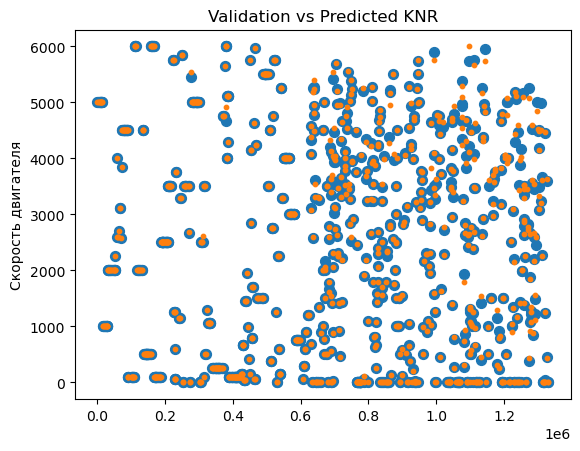

In [73]:
plt.scatter(X_val.index[:1000], y_val[:1000], s= 50)
plt.scatter(X_val.index[:1000], val_knr_predicted[:1000], s = 10)
plt.ylabel('Скорость двигателя')
plt.title("Validation vs Predicted KNR")
plt.show()

Почти 100% результат

Прям чудо какое-то

Но я почти уверен, что модель где-то жульничает 😡

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из сумм квадратов токов)
- Нормализация вектора напряжения. (корень квадратный из сумм квадратов напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [74]:
df['normal_i'] = np.sqrt(df['i_d']**2 + df['i_q']**2)
df['normal_u'] = np.sqrt(df['u_d']**2 + df['u_q']**2)
df['full_power'] = df['normal_i']*df['normal_u']
df['kpd'] = df['i_d']*df['u_d'] + df['i_q']*df['u_q']

In [75]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,stator,normal_i,normal_u,full_power,kpd
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,18.565479,0.004431,0.570659,0.002529,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,18.567384,0.000992,0.446789,0.000443,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,18.569927,0.001346,0.577165,0.000777,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,18.568802,0.002046,0.454893,0.000931,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,18.566872,0.074292,0.576530,0.042832,0.003852


**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**

In [76]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

In [77]:
for i in df['profile_id'].unique():
    df_shapes = df[df['profile_id']==i]
    print("{0} | {1}".format(i, df_shapes.shape))

17 | (15964, 18)
5 | (14788, 18)
12 | (21942, 18)
32 | (20960, 18)
21 | (17321, 18)
2 | (19357, 18)
4 | (33424, 18)
7 | (14651, 18)
19 | (10410, 18)
3 | (19248, 18)
9 | (20336, 18)
23 | (11856, 18)
27 | (35361, 18)
26 | (16666, 18)
11 | (7887, 18)
6 | (40388, 18)
10 | (15256, 18)
13 | (35906, 18)
31 | (15587, 18)
18 | (37732, 18)
30 | (23863, 18)
29 | (21358, 18)
8 | (18757, 18)
24 | (15015, 18)
20 | (43971, 18)
15 | (18124, 18)
14 | (18598, 18)
16 | (20645, 18)
36 | (22609, 18)
74 | (23761, 18)
75 | (13472, 18)
41 | (16700, 18)
68 | (23331, 18)
50 | (10810, 18)
53 | (32442, 18)
49 | (10816, 18)
81 | (17672, 18)
80 | (23824, 18)
59 | (7475, 18)
54 | (10807, 18)
57 | (14403, 18)
70 | (25677, 18)
51 | (6261, 18)
55 | (10807, 18)
45 | (17142, 18)
69 | (15350, 18)
61 | (14516, 18)
76 | (22188, 18)
56 | (33123, 18)
64 | (6250, 18)
72 | (15301, 18)
73 | (16786, 18)
62 | (25600, 18)
65 | (40094, 18)
63 | (16668, 18)
43 | (8443, 18)
47 | (2176, 18)
66 | (36476, 18)
42 | (16920, 18)
48 | (21983

***В данной части задания, выберу сессию испытания для тестирования моделей***

### Тестирование LR модели

_Решил тестировать модели на скорости двигателя из 8 сессии_

In [78]:
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,stator,normal_i,normal_u,full_power,kpd
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17,18.565479,0.004431,0.570659,0.002529,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17,18.567384,0.000992,0.446789,0.000443,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17,18.569927,0.001346,0.577165,0.000777,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17,18.568802,0.002046,0.454893,0.000931,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17,18.566872,0.074292,0.576530,0.042832,0.003852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71,41.954188,2.281500,2.293165,5.231856,-3.945756
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71,41.921423,2.281810,2.389213,5.451728,-4.037250
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71,41.889106,2.281306,2.277305,5.195230,-3.949953
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71,41.870471,2.281347,2.393406,5.460191,-4.012529


In [79]:
X_test_speed_8 = df[df['profile_id']==8].drop(['motor_speed', 'stator',
                                               'normal_i', 'normal_u',
                                               'full_power', 'kpd', 'profile_id'], axis = 1)
y_test_speed_8 = df[df['profile_id']==8].motor_speed

In [80]:
X_test_speed_8.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque
470261,-1.079264,15.940980,19.948320,1.444842,19.834501,-1.955996,0.627139,24.162611,19.466152,20.069771,0.461950
470262,-0.838450,15.836613,19.920626,1.040416,19.834057,-1.269508,0.760134,24.158400,19.456831,20.099291,0.493771
470263,-0.928413,15.738595,19.900782,1.254110,19.836317,-1.474062,0.855890,24.156725,19.439934,20.028801,0.504902
470264,-0.883131,15.668362,19.917431,1.293177,19.840372,-1.625474,0.924162,24.156097,19.427814,19.978292,0.599972
470265,-1.091173,15.665258,19.928398,1.448015,19.826004,-1.729537,0.974627,24.149403,19.427813,19.942101,0.565816


_Для обучения оставлю ту же модель, что и была до этого_

In [81]:
lr.fit(x1, y1)
y_lr_predicted_8 = lr.predict(X_test_speed_8)

In [82]:
print("MAE: {:.4f} | MSE: {:.4f}".format(mean_absolute_error(y_lr_predicted_8, y_test_speed_8),
                                    mean_squared_error(y_lr_predicted_8, y_test_speed_8)))

MAE: 149.0173 | MSE: 30392.4270


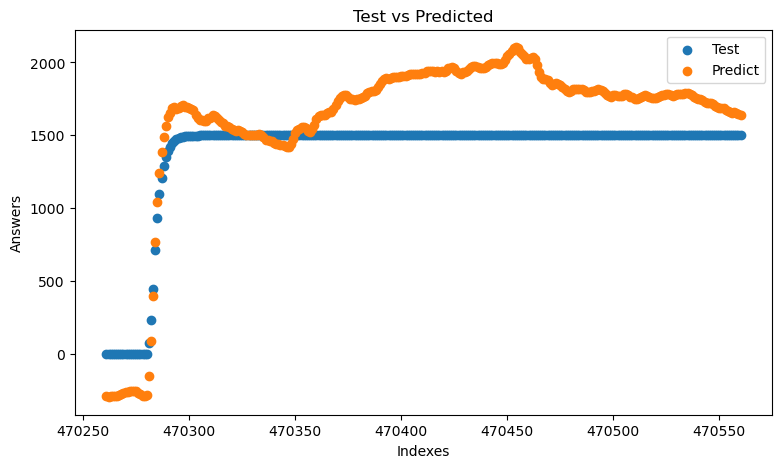

In [83]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(X_test_speed_8.index[:300], y_test_speed_8[:300], label = 'Test')
ax.scatter(X_test_speed_8.index[:300], y_lr_predicted_8[:300], label = 'Predict')
ax.set_xlabel('Indexes')
ax.set_ylabel("Answers")
ax.set_title('Test vs Predicted')
ax.legend()
plt.show()

***Показатели весьма удручают***

_Стоит попробовать на другой сессии_

_Есть вероятность, что данная модель для обучения не подходит под данные представленной сессии, но это значит только то, что ее реальное использование будет невозможно на данных, которых она не знает_

### Тестирование KNR модели

In [84]:
knr.fit(x5, y5)
y_knr_predicted_8 = knr.predict(X_test_speed_8)

In [85]:
print("MAE: {:.4f} | MSE: {:.4f}".format(mean_absolute_error(y_knr_predicted_8, y_test_speed_8),
                                    mean_squared_error(y_knr_predicted_8, y_test_speed_8)))

MAE: 0.0354 | MSE: 1.8907


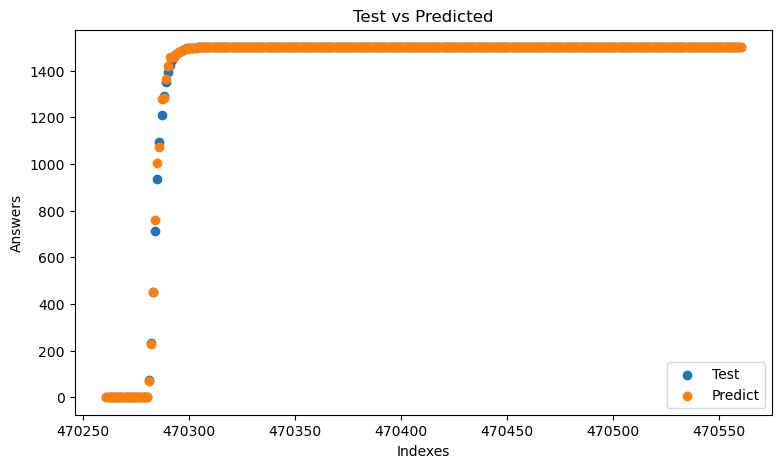

In [86]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(X_test_speed_8.index[:300], y_test_speed_8[:300], label = 'Test')
ax.scatter(X_test_speed_8.index[:300], y_knr_predicted_8[:300], label = 'Predict')
ax.set_xlabel('Indexes')
ax.set_ylabel("Answers")
ax.set_title('Test vs Predicted')
ax.legend()
plt.show()

_Какой-то невероятный результат, необходимо проверить, не было ли ответов в обучающей выборке_

In [87]:
X_test_speed_8.index

Int64Index([470261, 470262, 470263, 470264, 470265, 470266, 470267, 470268,
            470269, 470270,
            ...
            489008, 489009, 489010, 489011, 489012, 489013, 489014, 489015,
            489016, 489017],
           dtype='int64', length=18757)

In [88]:
x5.iloc[470261:489018]

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque
587369,31.225496,18.081390,57.786064,-40.664749,44.197571,-65.980011,172.999298,38.019859,34.544758,24.400066,139.392227
587370,31.230207,18.082556,57.758842,-40.648788,44.211643,-65.979965,172.999374,38.028721,34.551094,24.339216,139.396454
587371,31.225306,18.092592,57.831146,-40.659393,44.239613,-65.981613,172.999100,38.023762,34.553749,24.361832,139.397690
587372,31.218924,18.111534,57.904125,-40.680973,44.280228,-65.980659,172.999283,38.020039,34.558151,24.413376,139.407272
587374,31.214169,18.147081,57.721817,-40.698818,44.340332,-65.980125,172.999390,38.034630,34.555683,24.357727,139.409058
...,...,...,...,...,...,...,...,...,...,...,...
610771,15.649837,18.942276,23.647396,-2.136292,22.839085,-2.979691,15.774891,31.429888,21.125666,19.848583,10.728064
610772,15.649596,18.935041,23.648367,-2.140617,22.820011,-2.979588,15.774712,31.433798,21.156910,19.848501,10.722417
610773,15.648516,18.949814,23.701359,-2.142549,22.796970,-2.979732,15.774879,31.425663,21.160978,19.844671,10.716614
610774,15.648536,18.955328,23.740334,-2.143055,22.760151,-2.979599,15.774792,31.436260,21.094906,19.847822,10.720470


Ну само собой, что ответы были 😂

_Но потом я поднялся значительно выше и дописал shuffle в  Kfold_ 😁

_почему-то изначально не перемешал_

_Можно попробовать обучить на других данных, на тех же, что использовались и в ЛР_

In [92]:
knr.fit(x1, y1)
y_knr_predicted_8 = knr.predict(X_test_speed_8)
print("MAE: {:.4f} | MSE: {:.4f}".format(mean_absolute_error(y_knr_predicted_8, y_test_speed_8),
                                    mean_squared_error(y_knr_predicted_8, y_test_speed_8)))

MAE: 0.0295 | MSE: 1.4883


In [93]:
knr.fit(x2, y2)
y_knr_predicted_8 = knr.predict(X_test_speed_8)
print("MAE: {:.4f} | MSE: {:.4f}".format(mean_absolute_error(y_knr_predicted_8, y_test_speed_8),
                                    mean_squared_error(y_knr_predicted_8, y_test_speed_8)))

MAE: 0.0372 | MSE: 1.9175


In [94]:
knr.fit(x3, y3)
y_knr_predicted_8 = knr.predict(X_test_speed_8)
print("MAE: {:.4f} | MSE: {:.4f}".format(mean_absolute_error(y_knr_predicted_8, y_test_speed_8),
                                    mean_squared_error(y_knr_predicted_8, y_test_speed_8)))

MAE: 0.0454 | MSE: 3.1828


In [95]:
knr.fit(x4, y4)
y_knr_predicted_8 = knr.predict(X_test_speed_8)
print("MAE: {:.4f} | MSE: {:.4f}".format(mean_absolute_error(y_knr_predicted_8, y_test_speed_8),
                                    mean_squared_error(y_knr_predicted_8, y_test_speed_8)))

MAE: 0.0402 | MSE: 2.4567


### Вывод

_Метод ближайший соседей работает значительно лучше, нежели линейная регрессия, даже в том случае, что ответы могли попасть в тестовую выборку, метод кнн показал себя отлично и на валидационных данных._

_Касаемо ЛР, она дает очень далекие от истины предсказания, даже в том случае, что она могла увидеть тестовые ответы._

_Выбирая из двух моделей, я бы предпочтение отдал именно КНН, на мой взгляд он более "гибкий"._